<!--NAVIGATION-->
< [更多资源](03.13-Further-Resources.ipynb) | [目录](Index.ipynb) | [简单的折线图](04.01-Simple-Line-Plots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Visualization with Matplotlib

# 使用Matplotlib進行可視化

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

> In recent years, the interface and style of Matplotlib have begun to show their age.
Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

最近幾年，Matplotlib顯得有點過時了。 R語言中的ggplot和ggvis這些新工具廣泛應用了類似D3js和HTML5畫布這樣的Web技術，讓Matplotlib顯得相形見絀。近來的Matplotlib版本將設置新的圖表風格變得相對簡單了一些（參見[自定義matplotlib：配置和样式單](04.11-Settings-and-Stylesheets.ipynb)），而且開發者在Matplotlib基礎上開發了很多新的包，使得可視化過程能夠通過更清晰和現代的API來實現，例如Seaborn（參見[使用Seaborn進行可視化](04.14-Visualization-With-Seaborn.ipynb)）、[ggpy](http://yhat.github.io/ggpy/)、[HoloViews](http://holoviews.org/)和[Altair](http://altair-viz.github.io/)，而且Pandas本身也提供了對Matplotlib的API封裝。但是即使使用封裝後的API，深入研究Matplotlib的語法對於更精細的調整圖表的輸出也是非常有幫助的。正因為如此，作者深信Matplotlib仍然會在數據可視化技術棧中佔有不可或缺的地位，即使近期，社區已經逐步不再直接調用Matplotlib的API的情況下。

## 1.Setting Styles 設置風格

> We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

使用`plt.style`屬性用來給我們的圖表設置視覺的風格。下面我們設置使用`classic`風格，這讓我們之後的圖表都會保持使用經典Matplotlib風格：

In [3]:
print(plt.style.available)  # 可使用的樣式

plt.style.use('classic')
# plt.style.use('Solarize_Light2')
# plt.style.use('bmh')
# plt.style.use('classic')
# plt.style.use("dark_background")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### 字型 Font
預設字型無法使用中文，將下載的字型放入該位置

In [4]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'

## 2.`show()` 或是不要 `show()` ？如何顯示你的圖表

#### Plotting from a script 在腳本文件中作圖

> If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

如果你是在腳本文件中使用Matplotlib，`plt.show()`是你顯示圖表的函數。 `plt.show()`會啟動一個事件循環，找到所有激活的圖表對象，然後打開一個或多個交互的窗口來顯示你的圖表。

> One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

還要提醒一下：`plt.show()`函數在每個Python會話中*僅能使用一次*，最常見的情況就是在腳本的末尾使用它。多次調用`show()`函數會導致不可預料的結果，應該避免。

#### Plotting from an IPython shell 在IPython終端中作圖

> It can be very convenient to use Matplotlib interactively within an IPython shell (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

在IPython終端（參見[IPython：超越Python解釋器](01.00-IPython-Beyond-Normal-Python.ipynb)）中交互式使用Matplotlib是非常方便的。 IPython內建有支持Matplotlib的模式。要激活這個模式，你只需要在IPython終端輸入`%matplotlib`魔術指令即可：

> At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

這之後任何`plt`的作圖命令都會打開一個窗口包含作出的圖表，後續運行的命令還能更新圖表。某些改變（例如修改已經畫好的線條的屬性）不會自動更新，這時可以使用`plt.draw()`來強制更新窗口。在Matplotlib模式下是不需要使用`plt.show()`的。

#### Plotting from an IPython notebook 在IPython notebook中作圖

> Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

在IPython notebook中交互式的作圖也可以使用`%matplotlib`魔術指令，其工作方式類似於在IPython終端中一樣。而且在IPython notebook中，你還可以通過指定該魔術指令的參數讓作出的圖直接在內聯在notebook中顯示。兩個參數可以指定不同的作圖模式：

- `%matplotlib notebook`：在notebook中作出具有交互控制功能的內聯圖表
- `%matplotlib inline`： 在notebook中作出*靜態*內聯圖表

> After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

運行了這條魔術指令後（只需要在每個jupyter內核中運行一次即可），後續notebook中任何創建圖表的代碼都會輸出一個內嵌的PNG圖像，作出圖表：

In [5]:
%matplotlib inline

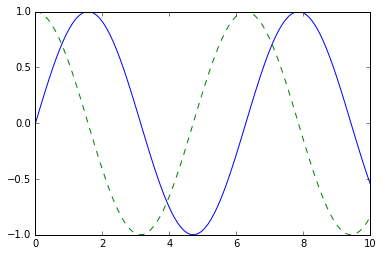

In [6]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## 3.Saving Figures to File 將圖表保存

> One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:
To confirm that it contains what we think it contains:

Matplotlib還有一個非常棒的功能，那就是將圖表保存成很多種不同的文件格式。保存圖表可以通過`savefig()`函數實現。例如，如果我們需要將上面的圖表保存成一個PNG文件，只需要執行下面的代碼：可以使用IPython的`Image`對象將這個圖像文件顯示出來，驗證一下保存的文件是否和圖表一致：

In [7]:
fig.savefig('input/my_figure.png')

## 4. Load Image 讀取圖表

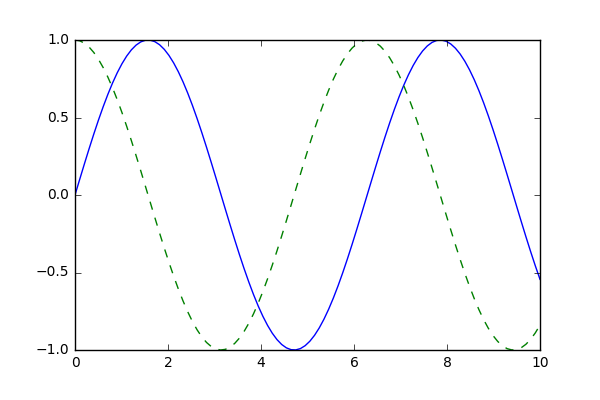

In [8]:
from IPython.display import Image
Image('input/my_figure.png')

## 5. Line Colors and Styles 調整線條顏色和風格

In [9]:
# plt.plot(x, y, 
#          color='color', 
#          linestyle='linestyle',    # 實solid(-) 虛dashed(--) 線點dashdot(-.) 點線dotted(:) 星號star(*)
#          marker='marker',          # 點point(.) 圓circle(o)  正方square(s)   加號plus(+)   鑽石diamond(D)
#                                      三角triangle(v^<>) 五邊形pentagon(p)  六邊形hexagonl(h) 打叉(x) 不畫線None
#          linewidth='linewidth')    # 線的寬度 linewidth (lw)

In [10]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import matplotlib.pyplot as plt
import numpy as np

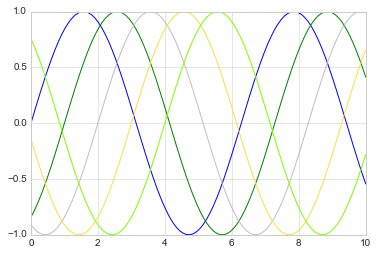

In [11]:
plt.plot(x, np.sin(x - 0), color='blue')         
plt.plot(x, np.sin(x - 1), color='g')           
plt.plot(x, np.sin(x - 2), color='0.75')        # 介於0-1之間的灰階值
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # 16進制的RGB值
plt.plot(x, np.sin(x - 4), color='chartreuse'); # 能支持所有HTML顏色名稱值

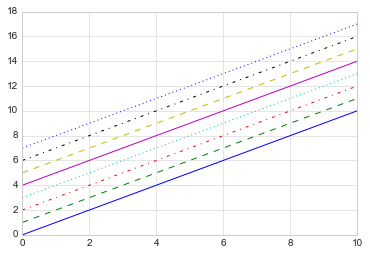

In [12]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
plt.plot(x, x + 4, linestyle='-')  # 實線
plt.plot(x, x + 5, linestyle='--') # 虛線
plt.plot(x, x + 6, linestyle='-.') # 長短點虛線
plt.plot(x, x + 7, linestyle=':');  # 點線

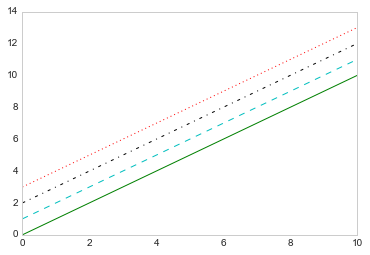

In [28]:
plt.plot(x, x + 0, '-g')  # 綠色實線
plt.plot(x, x + 1, '--c') # 天青色虛線
plt.plot(x, x + 2, '-.k') # 黑色長短點虛線
plt.plot(x, x + 3, ':r');  # 紅色點線
plt.grid()   # 無背景

## 6.Axes Limits 調整坐標軸範圍

> Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

Matplotlib會自動選擇非常合適的坐標軸範圍來繪製你的圖像，但是有些情況下你也需要自己進行相關調整。使用`plt.xlim()`和`plt.ylim()`函數可以調整坐標軸的範圍：

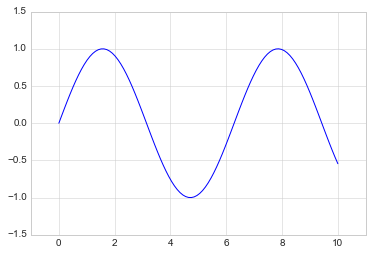

In [14]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)     # 反著寫即可反轉
plt.ylim(-1.5, 1.5);

#plt.axis([-1, 11, -1.5, 1.5]); #same

> The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

當然`plt.axis()`函數不僅能設置範圍，還能像下面代碼一樣將坐標軸壓縮到剛好足夠繪製折線圖像的大小：

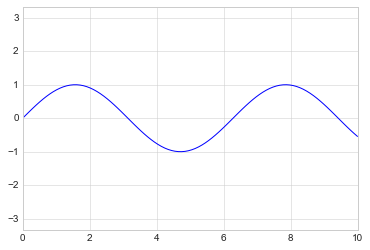

In [15]:
plt.plot(x, np.sin(x))
plt.axis('tight');  # limite(x,y)
plt.axis('equal');  # equal(x,y)

## 7.Labeling & Annotation 標籤與標注

> Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them: Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot. If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one. We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:


標題和坐標軸標籤是最簡單的這類標籤，Matplotlib提供了函數用來方便的設置它們：有時候我們可能需要在同一個圖表維度中設計多個圖例。通過標準的`legend`接口，只能在整張圖表上創建一個圖例。如果你試圖使用`plt.legend()`或`ax.legend()`創建第二個圖例，那麼第二條語句創建的圖例會覆蓋第一條語句創建的。我們只能通過創建一個新的圖例artist這種方法來解決，然後使用`ax.add_artist()`將第二個作者加到圖表上：

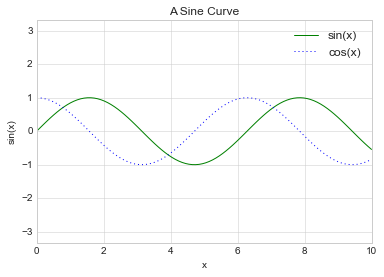

In [16]:
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

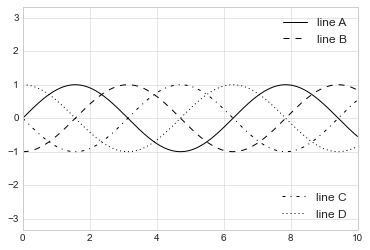

In [25]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),styles[i], color='black')

# 第一個圖例 label
ax.axis('equal')
ax.legend(lines[:2], ['line A', 'line B'],loc='upper right', frameon=False)  

# 第二個圖例 add_artist,label
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],loc='lower right', frameon=False) 
ax.add_artist(leg);

Text(5, 1.5, 'second')

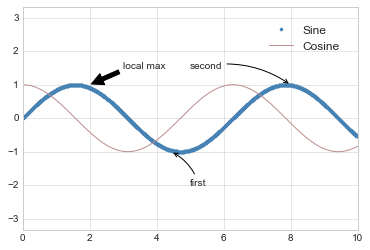

In [16]:
data = np.linspace(0,10, 1000)  #產生 0~10區間的 等間隔序列
fig, ax = plt.subplots()

plt.plot(data, np.sin(data), '.', color='SteelBlue', label='Sine')
plt.plot(data, np.cos(data), '-', color='RosyBrown', label='Cosine')

ax.axis('equal')
ax.legend(loc='upper right',shadow=True)  
ax.legend(loc='upper left', frameon=False)  #指定圖例位置並且去除邊框
ax.legend(loc='lower center',frameon=False, ncol=2)  #我們可以使用ncol屬性設置圖例中每行的列數：
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1) # 圓角方框（fancybox）方框透明度（alpha）或修改文字邊距


#### 標注 annotate #####

             # word      #data      #word position 
ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),)

ax.annotate('first', xy = (4.44,-1), xytext = (5,-2), 
            arrowprops = dict(arrowstyle='->', connectionstyle="arc3,rad=.2"),)

ax.annotate('second', xy = (8,1), xytext = (5,1.5), 
            arrowprops = dict(arrowstyle='->', connectionstyle="arc3,rad=-.2"))

## 8.Visualizing Errors 誤差可視化

In [17]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import matplotlib.pyplot as plt
import numpy as np

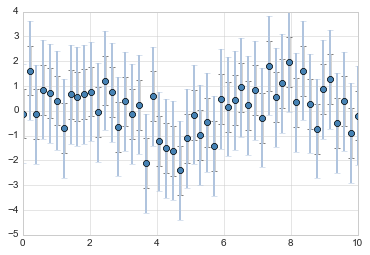

In [18]:
# Basic Errorbars 基礎誤差條

x = np.linspace(0, 10, 50)
y = np.sin(x) + 0.8 * np.random.randn(50)

plt.errorbar(x, y, yerr=1, fmt='.k');
plt.errorbar(x, y, yerr=1, fmt='o', color='black',ecolor='lightgray', elinewidth=3, capsize=0);
plt.errorbar(x, y, yerr=2, fmt='o', color='SteelBlue', ecolor='LightSteelBlue', elinewidth=2); 
                                                     # ecolor->誤差的顏色  elinewidth->誤差的寬度

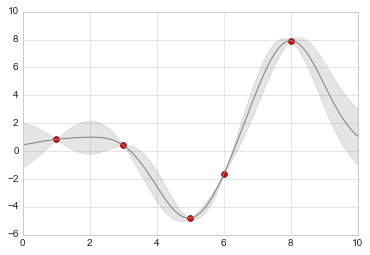

In [19]:
## Continuous Errors 連續誤差

from sklearn.gaussian_process import GaussianProcessRegressor
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 計算高斯過程回歸，使其符合 fit 數據點
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

# 數據連續擬合值以及誤差
xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 兩倍sigma ~ 95% 確定區域

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

# 在誤差限區域內填充一道淺色的誤差帶來展示連續誤差
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlim(0, 10);

## 9.Colorbars 顏色條

> Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.

圖例可以將離散的點標示為離散的標籤。對於建立在不同顏色之上的連續的值（點線面）來說，標註了的顏色條是非常方便的工具。 Matplotlib的顏色條是獨立於圖表之外的一個類似於比色卡的圖形，用來展示圖表中不同顏色的數值含義。

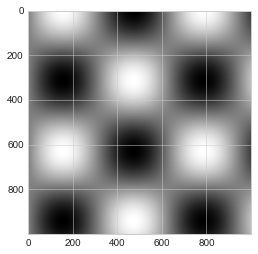

In [20]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)               # Colorbars
plt.imshow(I, cmap='gray'); # gray colorbars

#plt.colorbar();

## 10.Colormap 色圖

- *序列色圖*：這類型的色譜只包括一個連續序列的色系（例如`binary`或`viridis`）。
- *分化色圖*：這類型的色譜包括兩種獨立的色系，這兩種顏色有著非常大的對比度（例如`RdBu`或`PuOr`）。
- *定性色圖*：這類型的色圖混合了非特定連續序列的顏色（例如`rainbow`或`jet`）。

In [21]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """返回給定色圖的灰度版本"""
    cmap = plt.cm.get_cmap(cmap) # 使用名稱獲取色圖對象
    colors = cmap(np.arange(cmap.N)) # 將色圖對象轉為RGBA矩陣，形狀為N×4
    
    # 將RGBA顏色轉換為灰度 : 參考 http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114] # RGB三色的權重值
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight)) # RGB平方值和權重的點積開平方根
    colors[:, :3] = luminance[:, np.newaxis] # 得到灰度值矩陣
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)     # 返回相應的灰度值色圖
    

def view_colormap(cmap):
    """將色圖對應的灰度版本繪製出來"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

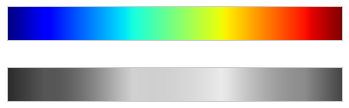

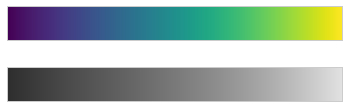

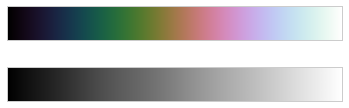

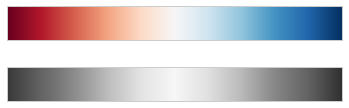

In [22]:
view_colormap('jet')      # jet 不規則強亮條紋
view_colormap('viridis')  # viridis 均勻的亮度
view_colormap('cubehelix')# cubehelix 虹彩色紋
view_colormap('RdBu')     # RdBu（Red-Blue）雙色顏色條如

## 11.Color limits and extensions 顏色限制和擴展

> Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.
In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits.
The result is a much more useful visualization of our data.

注意到在左邊的圖表中，默認的顏色閾值是包括了噪聲的，因此整體的條紋形狀都被噪聲數據沖刷淡化了。而右邊的圖表，我們手動設置了顏色的閾值，並在繪製顏色條是加上了`extend`參數來表示超出閾值的數據。對於我們的數據來說，右圖比左圖要好的多。

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_8182/530369598.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_8182/530369598.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(extend='both')
/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_8182/530369598.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


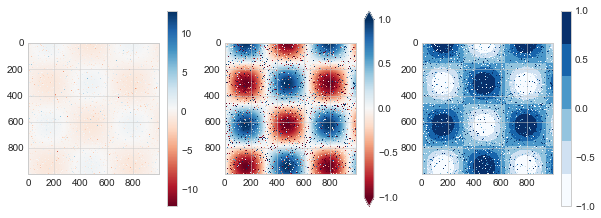

In [33]:
speckles = (np.random.random(I.shape) < 0.01)  #數組生成不超過 1%噪點
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))
# 不去除噪點的分布
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

# 去除噪點的分布
plt.subplot(1, 3, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

# Discrete Color Bars 離散色條
plt.subplot(1, 3, 3)
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## 12.Density and Contour Plots

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_9255/2326974560.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


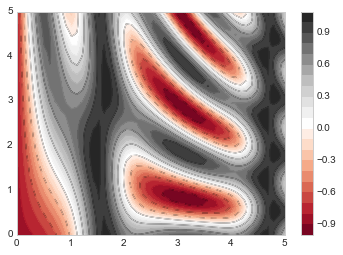

In [58]:
def f(x,y):
    return np.sin(x)** 10 + np.cos(10 + y*x)*np.cos(x)

x = np.linspace(0,5 ,50)
y = np.linspace(0,5,40)
x,y = np.meshgrid(x,y)

plt.contour (x, y, f(x,y), colors='black')
plt.contour (x, y, f(x,y), 20, cmap='RdGy')
plt.contourf(x, y, f(x,y), 20, cmap='RdGy')  #contourf

plt.colorbar()

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_9255/1663762491.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


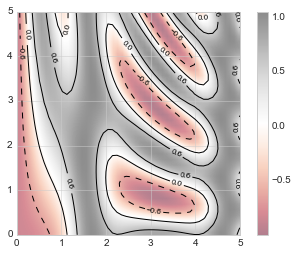

In [36]:
contours = plt.contour(x,y,z,3, colors = 'black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(z, extent=[0,5,0,5], origin = 'lower', cmap='RdGy', alpha=0.5)
plt.colorbar()

## 13.Univariate Analysis 單變量分析

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


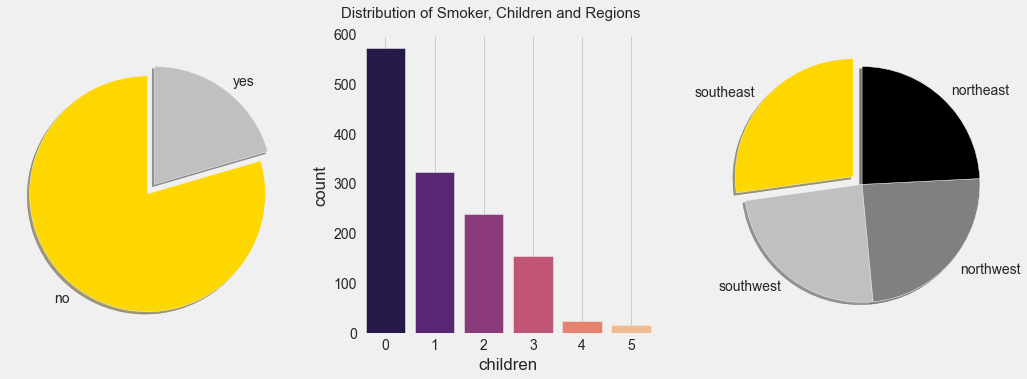

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

data = pd.read_csv('input/pd-med-insurance.csv')
data.head()

# lets check the distribution of smoker, children and region

plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold','silver'],startangle = 90,shadow = True,explode = [0.1, 0])

plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold','silver','grey','black'],startangle = 90,shadow = True,explode = [0.1, 0, 0, 0])
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 15)
plt.show()

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

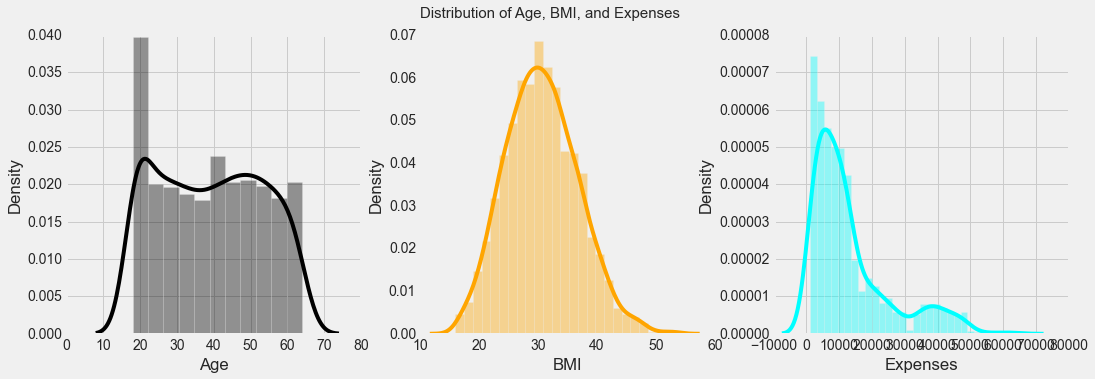

In [61]:
plt.subplot(1, 3, 1)
sns.distplot(data['age'], color = 'black')
plt.xlabel('Age')

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'aqua')
plt.xlabel('Expenses')

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

## 14. Bivariate Analysis 雙變量分析

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


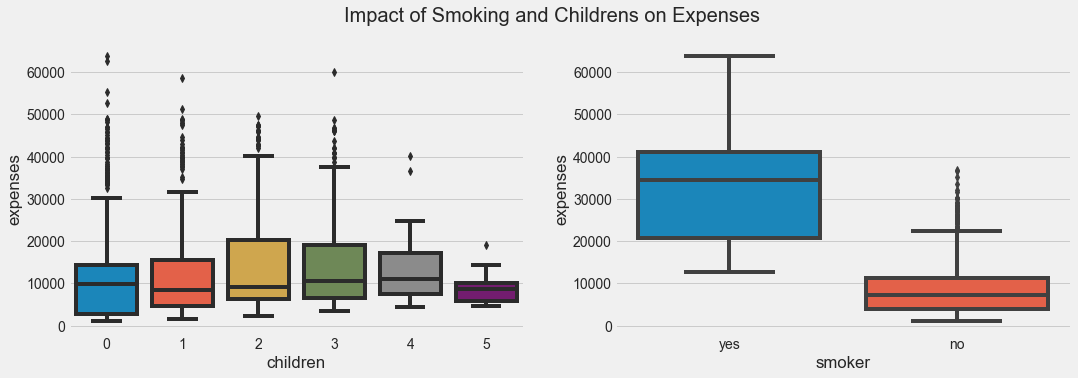

In [14]:
plt.subplot(1, 2, 1)
sns.boxplot(data['children'], data['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of Smoking and Childrens on Expenses', fontsize = 20)
plt.show()

In [19]:
px.bar_polar(data, r="expenses", theta="region", color = 'sex', template = 'plotly_dark',
            color_discrete_sequence= px.colors.sequential.Plasma_r)

## 15.Pie chart 圓餅圖

([<matplotlib.patches.Wedge at 0x7fd8d4707040>,
 [Text(1.0422211767359784, 0.3518167403110212, 'A'),
  Text(0.37715676485049143, 1.0333212350123804, 'B'),
  Text(-0.977662759306726, 0.695827226446881, 'C'),
  Text(-0.8856900828023644, -0.6523442934720446, 'D'),
  Text(-0.257225239222396, -1.069502303086338, 'E'),
  Text(0.7553479605186184, -0.7996558375578608, 'F')],
 [Text(0.5684842782196246, 0.19190004016964793, '10.4%'),
  Text(0.20572187173663167, 0.5636297645522075, '18.1%'),
  Text(-0.5703032762622567, 0.40589921542734725, '23.3%'),
  Text(-0.4831036815285623, -0.35582416007566064, '16.6%'),
  Text(-0.1403046759394887, -0.583364892592548, '5.7%'),
  Text(0.4120079784647009, -0.4361759113951968, '25.9%')])

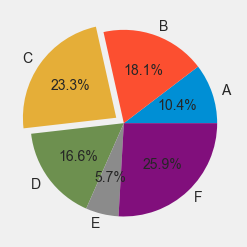

In [44]:
fig = plt.figure()

labels    = ["A","B","C","D","E","F"]
word_size = [20, 35, 45 , 32, 11, 50]
explode   = [0 , 0, .1, 0, 0, 0]       #凸出率

plt.pie(word_size, explode= explode, labels = labels, 
        autopct= "%3.1f%%") # autopct-->項目百分比的格式

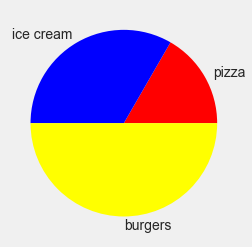

In [45]:
food = ['pizza','ice cream','burgers']
sales = [10,20,30]
color = ['red','blue','yellow']

plt.pie(sales,labels=food,colors=color)  
#plt.hist(x,y,histtype="step") 
plt.show() 

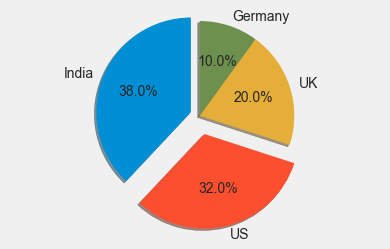

In [46]:
labels='India','US','UK','Germany'
sizes=[38,32,20,10]
explode=(0.1,0.2,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 16. Andrews_curves

In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('input/iris.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

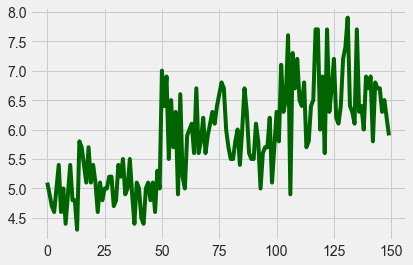

In [54]:
df['Sepal Length'].plot(color = 'darkgreen')  

<AxesSubplot:>

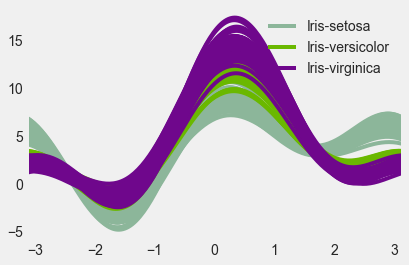

In [55]:
pd.plotting.andrews_curves(df,'class')

## 17.Scatter Matrix

array([[<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Sepal Length'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Sepal Length'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Sepal Width'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Sepal Width'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Petal Length'>,
        <AxesSubplot:xlabel='Petal Width', ylabel='Petal Length'>],
       [<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Width'>,
        <AxesSubplot:xlabel='Sepal Width', ylabel='Petal Width'>,
        <AxesSubplot:xlabel='Petal Length', ylabel='Petal 

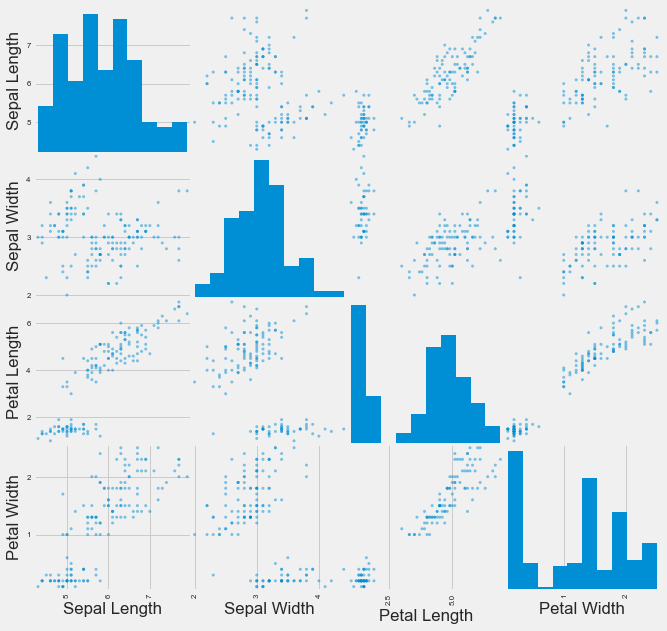

In [56]:
pd.plotting.scatter_matrix(df, figsize = (10, 10))

## 18.Autocorrelation Plot (plot_acf)

In [67]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


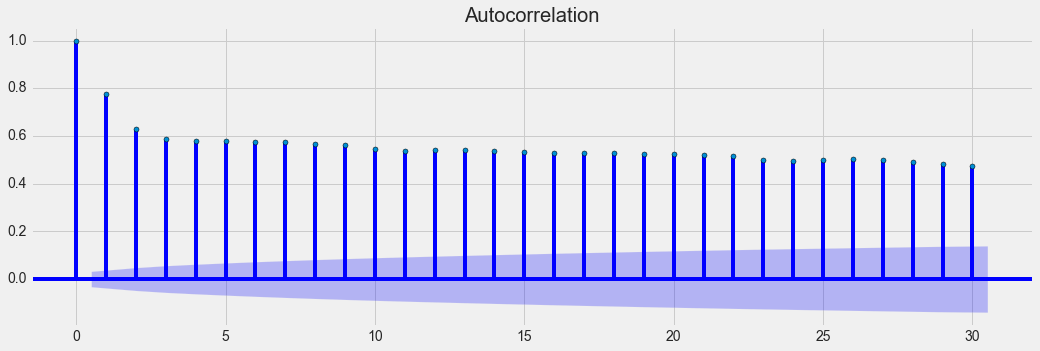

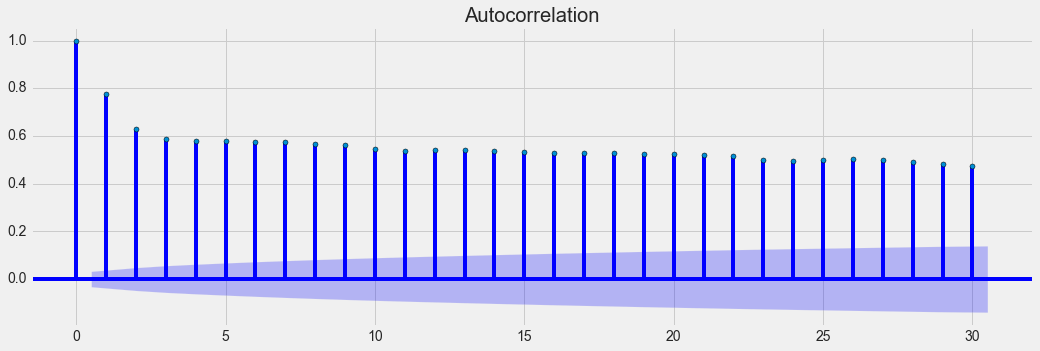

In [68]:
plot_acf(df['Temp'], lags=30)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

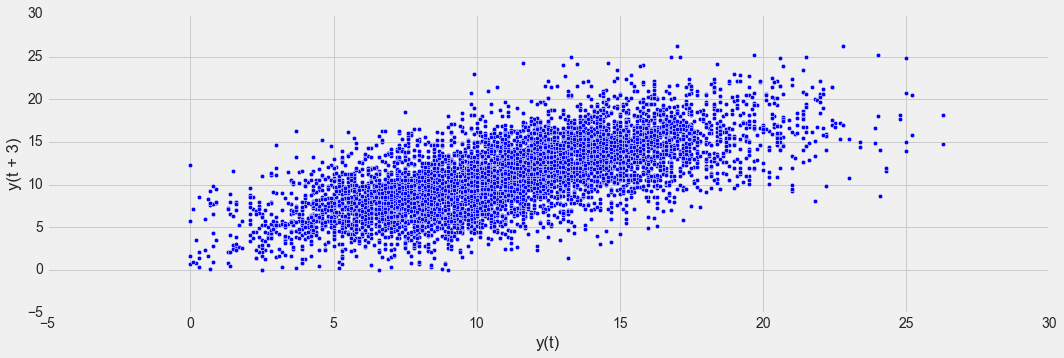

In [69]:
# lag plot
from pandas.plotting import lag_plot
lag_plot(df['Temp'])
lag_plot(df['Temp'], lag = 3)

## 19.Bootstrap Plot

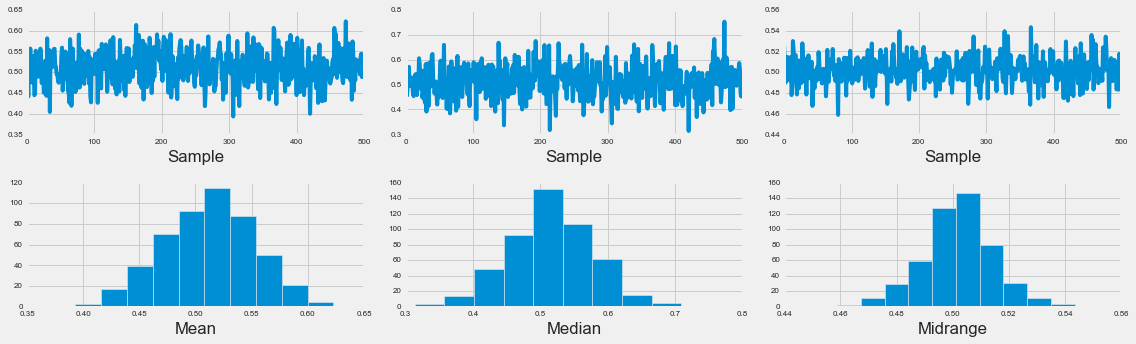

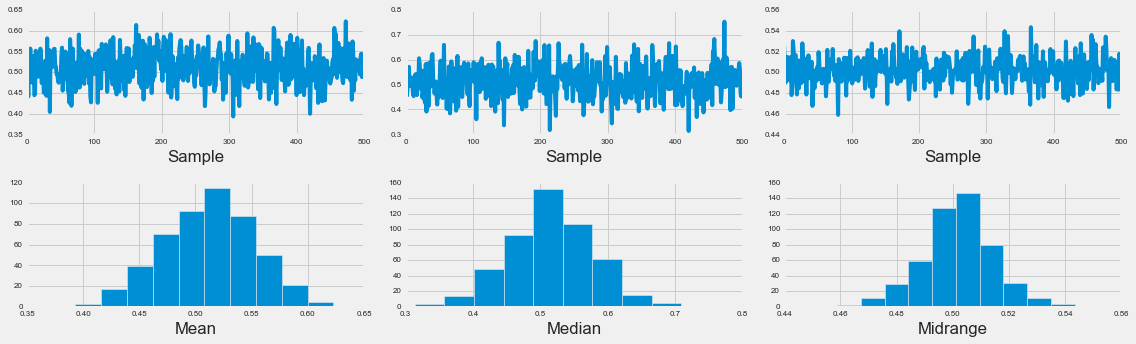

In [71]:
## import pandas as pd
import numpy as np
s = pd.Series(np.random.uniform(size=500))
pd.plotting.bootstrap_plot(s)

#### <!--NAVIGATION-->
< [更多资源](03.13-Further-Resources.ipynb) | [目录](Index.ipynb) | [简单的折线图](04.01-Simple-Line-Plots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
